In [1]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline


In [2]:
table = pandas.read_csv('counties.csv')
table

,Name,State,Population,PercentCollegeGrad,IncomePerCapita,Employees,RetailSales,MedianRent
0,Aleutians East,AK,2305,12.9,20114,1410,6693,518
1,Aleutians West,AK,5259,14.8,20298,4321,24233,428
2,Anchorage,AK,251335,26.9,26619,93037,2612640,528
3,Bethel,AK,15525,13.1,15493,2269,59687,460
4,Bristol Bay,AK,1023,18.9,29699,392,9653,464
...,...,...,...,...,...,...,...,...
3135,Sweetwater,WY,40976,13.3,19767,14141,343920,279
3136,Teton,WY,13444,30.0,35983,10359,251764,392
3137,Uinta,WY,20087,14.3,16105,4928,135950,258
3138,Washakie,WY,8657,18.4,18342,2598,57057,236


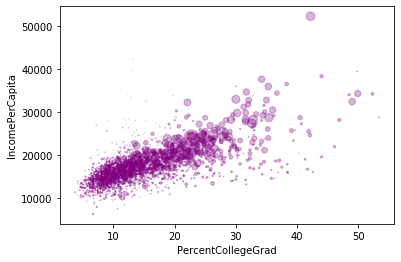

In [14]:
scatter_plot = table.plot.scatter(
    x = 'PercentCollegeGrad', # x-axis
    y = 'IncomePerCapita', # y-axis
    s = table.Population/20000,   # size of the dot
    c = 'purple',
    alpha=0.3
)


In [4]:
filtered = table[table['IncomePerCapita'] != 0]

In [5]:
#Pearson_correlation_numerator
#X = IncomePerCapita
#Y = PercentCollegeGrad

x_bar = filtered.IncomePerCapita.mean()
y_bar = filtered.PercentCollegeGrad.mean()

list_x = []
x = 0 
for item in filtered.IncomePerCapita:
    x = (item - x_bar)
    list_x.append(x)

list_y = []
y = 0
for item in filtered.PercentCollegeGrad:
    y = (item - y_bar)
    list_y.append(y)

z = [list_x[i]*list_y[i] for i in range(len(list_x))]
numerator = sum(z)
numerator 

49718916.134599335

In [6]:
#Pearson_correlation_denominator
#X = IncomePerCapita
#Y = PercentCollegeGrad

list_xx = []
xx = 0 
for item in filtered.IncomePerCapita:
    xx = (item - x_bar)**2
    list_xx.append(xx)
a = (sum(list_xx))**0.5

list_yy = []
yy = 0 
for item in filtered.PercentCollegeGrad:
    yy = (item - y_bar)**2
    list_yy.append(yy)
b = (sum(list_yy))**0.5

denominator = a * b

In [7]:
Pearsons = numerator / denominator 
Pearsons

0.6480384056967844

In [8]:
#x = percent college grade
#y = income per capita
m, b = numpy.polyfit(filtered.PercentCollegeGrad, filtered.IncomePerCapita, 1 , rcond=None, full=False, w=None, cov=False)
mb = (m, b)
mb

(382.1477454254687, 11694.796061019135)

In [10]:
Regression_list = []
for i in filtered.PercentCollegeGrad:
    Regression = m * i + b
    Regression_list.append(Regression)

Income_list = []
for i in filtered.IncomePerCapita:
    Income_list.append(i)
Income_list

e = [Income_list[i]-Regression_list[i] for i in range(len(Income_list))]

table = filtered.assign(Error = e)

Error_list = table[['Name', 'State', 'Error']]
Error_list = Error_list.sort_values(['Error'], ascending=[False])
Error_list

,Name,State,Error
2728,Sherman,TX,25633.853699
2006,New York,NY,24455.569082
2415,Sully,SD,23082.498023
1964,Esmeralda,NV,19528.363965
917,Greeley,KS,17479.121816
...,...,...,...
1562,Oktibbeha,MS,-10643.879591
2538,Brazos,TX,-10773.685347
2030,Tompkins,NY,-10928.357045
2369,Clay,SD,-11045.759220


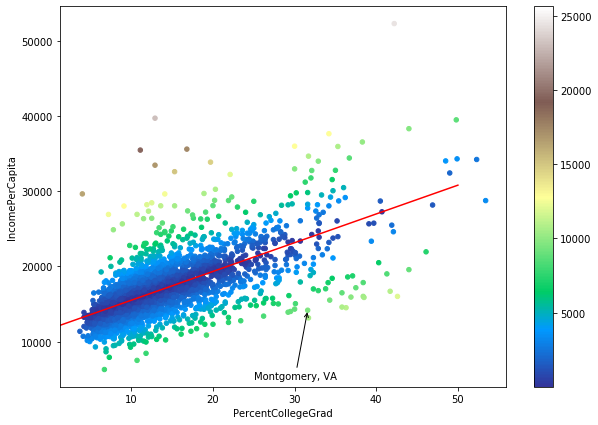

In [11]:
plot = table.plot.scatter(
    x='PercentCollegeGrad', 
    y='IncomePerCapita',
    c = abs(table.Error), 
    colormap=plt.cm.terrain,
    figsize=(10,7),
    sharex=False, 
)
plot.add_line(matplotlib.lines.Line2D([0, 50], [11694, 30801], \
              color="red"))
plot.annotate("Montgomery, VA",
            xy=(31.6,14185), xycoords='data',
            xytext=(25, 5000), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plot                   